KARINA SEBASTIAN

2348433

Geospatial Data Analysis Lab

Assignment -4

**Implementing machine learning models for spatial prediction tasks using python**

In [1]:
# Install necessary libraries
!pip install scikit-learn
!pip install pandas


In [2]:
import pandas as pd

# Load dataset (Assuming you uploaded it to Colab)
data = pd.read_csv('/content/worldcities.csv')

# Preview the data
print(data.head())

          city   city_ascii      lat       lng        country iso2 iso3  \
0        Tokyo        Tokyo  35.6850  139.7514          Japan   JP  JPN   
1     New York     New York  40.6943  -73.9249  United States   US  USA   
2  Mexico City  Mexico City  19.4424  -99.1310         Mexico   MX  MEX   
3       Mumbai       Mumbai  19.0170   72.8570          India   IN  IND   
4    São Paulo    Sao Paulo -23.5587  -46.6250         Brazil   BR  BRA   

         admin_name  capital  population          id  
0             Tōkyō  primary  35676000.0  1392685764  
1          New York      NaN  19354922.0  1840034016  
2  Ciudad de México  primary  19028000.0  1484247881  
3       Mahārāshtra    admin  18978000.0  1356226629  
4         São Paulo    admin  18845000.0  1076532519  


**Classification Task: Predict Region Based on Latitude and Longitude**

In [18]:
print(data['capital'].unique())

['primary' nan 'admin' 'minor']


In [19]:

import pandas as pd
# ... (rest of your existing code)

# Load dataset (Assuming you uploaded it to Colab)
data = pd.read_csv('/content/worldcities.csv')

# ... (other code)

# Drop rows with NA values in the 'capital' column
data_cleaned = data.dropna(subset=['capital'])


In [22]:


# Assuming 'data_cleaned' DataFrame from the previous code is available

# Separate features (X) and target variable (y)
X = data_cleaned.drop('capital', axis=1)  # Features
y = data_cleaned['capital']  # Target variable

# Convert non-numeric columns to numerical representations
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42) # Increased n_estimators for better performance
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       admin       0.89      0.95      0.92       762
       minor       0.83      0.79      0.81       236
     primary       0.83      0.19      0.31        52

    accuracy                           0.88      1050
   macro avg       0.85      0.64      0.68      1050
weighted avg       0.87      0.88      0.86      1050



**Regression Task: Predict Population Based on Latitude and Longitude:
python**



**Anomaly Detection Task: Detect Anomalies in Population or Location**

<ipython-input-14-485a6ac50a1e>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['population'].fillna(data['population'].mean(), inplace=True)


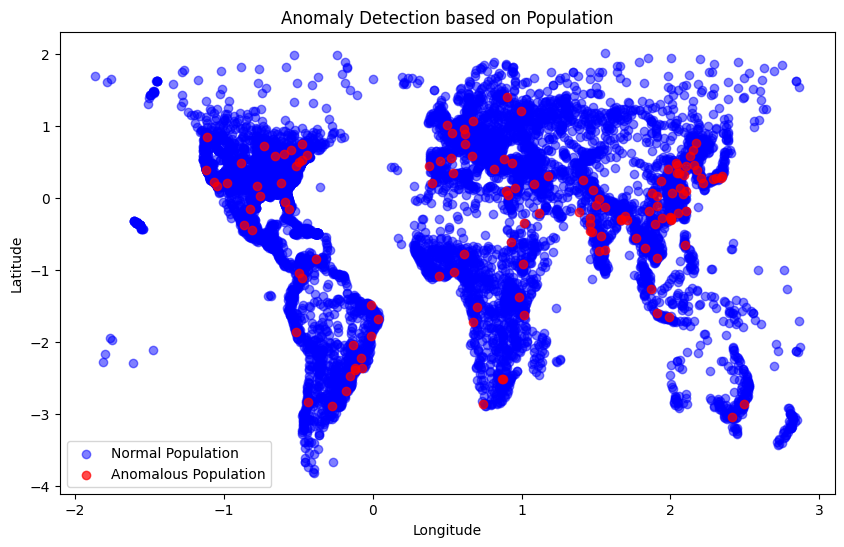

In [14]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt


# Anomaly Detection based on Population

# Handle missing values in 'population' (you might want a more sophisticated strategy)
data['population'].fillna(data['population'].mean(), inplace=True)

# Define a threshold for anomaly detection based on population (e.g., top 1%)
threshold = np.percentile(data['population'], 99) # Adjust the percentile as needed

# Create a boolean Series indicating anomalies
anomalies_population = data['population'] > threshold

# Visualize anomalies based on population
plt.figure(figsize=(10, 6))
plt.scatter(data['lng'][~anomalies_population], data['lat'][~anomalies_population],
            color='blue', label='Normal Population', alpha=0.5)
plt.scatter(data['lng'][anomalies_population], data['lat'][anomalies_population],
            color='red', label='Anomalous Population', alpha=0.7)  # Highlight anomalies

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Anomaly Detection based on Population')
plt.legend()
plt.show()


# Further Analysis: Combining Anomaly Detection Methods
# You can combine the results from Isolation Forest, One-Class SVM, LOF, and population-based anomaly detection.
# For example, count the number of times a city is flagged as an anomaly across multiple methods.  Cities identified as outliers by multiple methods are more likely to be true anomalies.